<a href="https://colab.research.google.com/github/jacklmg75/data-extraction/blob/main/1_4_Minera%C3%A7%C3%A3o_de_Texto_Extra_Portugues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mineração de Texto - Extra - Português

In [ ]:
%%capture

import nltk   # Livro http://www.nltk.org/book
import pandas as pd  # https://www.dataschool.io/best-python-pandas-resources/


# tokenizar / quebrar em termos /  bag of words
from nltk.tokenize import word_tokenize
nltk.download('punkt') # faz o download do "tokenizador" que será usado em word_tokenize

# lista de stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Remoção de acentuação
!pip install unidecode
from unidecode import unidecode

# Stemming
nltk.download('rslp')
from nltk.stem import RSLPStemmer

In [ ]:
# Lê arquivo em csv através de uma URL

url = 'https://www.dropbox.com/s/t56ubqlsuo3y8la/coleta.csv?dl=1'  # Arquivo tweets em csv salvo no dropbox. O parametro dl=1 força o download direto (sem preview)
df = pd.read_csv(url)

In [ ]:
# preview do dataframe lido

df.head(2)  # você pode definir o número de linhas

,Title,Document body text,Author,Category
0,00110011o,mano o torcedor psicopata do Brasil faz ADS na...,- ジジリ,"crz, sp"
1,01far,torcedor reclama de tudo\n se não convoca recl...,- robson,MG; Beagá


# POS TAGGING

## Em português temos menos trabalhos relacionados e dicionários..
Mas temos recursos interessantes

In [ ]:
%%capture
nltk.download('mac_morpho')
from nltk.corpus import mac_morpho  # read the docs:  https://sites.google.com/site/linguacorpus/acdc/mac-morpho
                                    # related papers  http://nilc.icmc.usp.br/macmorpho/macmorpho-manual.pdf
                                    #                 https://pdfs.semanticscholar.org/3526/ff418d3a66c559ddabbe0a0d0555d0998069.pdf

In [ ]:
tagged_sents = mac_morpho.tagged_sents()
tagged_sents

[[('Jersei', 'N'), ('atinge', 'V'), ('média', 'N'), ('de', 'PREP'), ('Cr$', 'CUR'), ('1,4', 'NUM'), ('milhão', 'N'), ('em', 'PREP|+'), ('a', 'ART'), ('venda', 'N'), ('de', 'PREP|+'), ('a', 'ART'), ('Pinhal', 'NPROP'), ('em', 'PREP'), ('São', 'NPROP'), ('Paulo', 'NPROP')], [('Programe', 'V'), ('sua', 'PROADJ'), ('viagem', 'N'), ('a', 'PREP|+'), ('a', 'ART'), ('Exposição', 'NPROP'), ('Nacional', 'NPROP'), ('do', 'NPROP'), ('Zebu', 'NPROP'), (',', ','), ('que', 'PRO-KS-REL'), ('começa', 'V'), ('dia', 'N'), ('25', 'N|AP')], ...]

In [ ]:
from nltk.tag.sequential import UnigramTagger

In [ ]:
unigram_tagger = UnigramTagger(tagged_sents)
unigram_tagger.tag(word_tokenize("Essa matéria é boa demais cara!"))

[('Essa', 'PROADJ'),
 ('matéria', 'N'),
 ('é', 'V'),
 ('boa', 'ADJ'),
 ('demais', 'PROADJ'),
 ('cara', 'N'),
 ('!', '!')]

In [ ]:
documents_text = df['Document body text']  # recebemos o texto
doc_text = documents_text[0] # Apenas a 1a linha (posição 0)
print(doc_text)

mano o torcedor psicopata do Brasil faz ADS na Fatec de franca, agora eu entendi porq q ele é assim


In [ ]:
unigram_tagger.tag(word_tokenize(doc_text))

[('mano', None),
 ('o', 'ART'),
 ('torcedor', 'N'),
 ('psicopata', 'N'),
 ('do', 'NPROP'),
 ('Brasil', 'NPROP'),
 ('faz', 'V'),
 ('ADS', None),
 ('na', 'NPROP'),
 ('Fatec', None),
 ('de', 'PREP'),
 ('franca', 'ADJ'),
 (',', ','),
 ('agora', 'ADV'),
 ('eu', 'PROPESS'),
 ('entendi', 'V'),
 ('porq', None),
 ('q', None),
 ('ele', 'PROPESS'),
 ('é', 'V'),
 ('assim', 'ADV')]

In [ ]:
text =  "Saiba quem é Cristiano Carvalho, o melhor professor da PUC Minas"

print(text)
text_with_tags = unigram_tagger.tag(word_tokenize(text))
print(text_with_tags)

Saiba quem é Cristiano Carvalho, o melhor professor da PUC Minas
[('Saiba', 'V'), ('quem', 'PRO-KS'), ('é', 'V'), ('Cristiano', 'NPROP'), ('Carvalho', 'NPROP'), (',', ','), ('o', 'ART'), ('melhor', 'ADJ'), ('professor', 'N'), ('da', 'NPROP'), ('PUC', 'NPROP'), ('Minas', 'NPROP')]


In [ ]:
print("Entidades")
[entidade for entidade in text_with_tags if entidade[1] == "NPROP"]

Entidades


[('Cristiano', 'NPROP'),
 ('Carvalho', 'NPROP'),
 ('da', 'NPROP'),
 ('PUC', 'NPROP'),
 ('Minas', 'NPROP')]

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.ne_chunk(text_with_tags)
print(entities)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
(S
  Saiba/V
  quem/PRO-KS
  é/V
  Cristiano/NPROP
  Carvalho/NPROP
  ,/,
  o/ART
  melhor/ADJ
  professor/N
  da/NPROP
  PUC/NPROP
  Minas/NPROP)


## Dicionários próprios

In [ ]:
dictionary = [[('desapontado', 'NEG'), ('brasil', 'LOCATION')]]
dummy_dict_tagger = UnigramTagger(dictionary)

In [ ]:
text =  df.loc[825]['Document body text']
print(text)
tokens = word_tokenize(text)
tokens = [token.lower() for token in tokens]
print(tokens)

Desapontado porque o torcedor misterioso do Brasil não é brasileiro
['desapontado', 'porque', 'o', 'torcedor', 'misterioso', 'do', 'brasil', 'não', 'é', 'brasileiro']


In [ ]:
print(tokens)
print(dummy_dict_tagger.tag(tokens))

['desapontado', 'porque', 'o', 'torcedor', 'misterioso', 'do', 'brasil', 'não', 'é', 'brasileiro']
[('desapontado', 'NEG'), ('porque', None), ('o', None), ('torcedor', None), ('misterioso', None), ('do', None), ('brasil', 'LOCATION'), ('não', None), ('é', None), ('brasileiro', None)]


# Coleções com sentimento de palavras

In [ ]:
dict_positives = pd.read_csv("https://www.dropbox.com/s/srvm7wxi4ybbjif/corpus-traduzido-positivo.csv?dl=1",header=None)
dict_positives.head()

,0,1
0,abidance,abidance
1,abidance,abidance
2,abide,respeitar
3,abilities,habilidades
4,ability,capacidade


In [ ]:
dict_negatives = pd.read_csv("https://www.dropbox.com/s/4cdsao9g87u2eio/corpus-traduzido-negativo.csv?dl=1",header=None)
dict_negatives.head()

,0,1
0,abandoned,abandonado
1,abandonment,abandono
2,abandon,abandonar
3,abase,abase
4,abasement,humilhação


In [ ]:
# Lendo as palavras positivas e definindo nome da tag como POSITIVE

positive_tags = [(word, "POSITIVE") for word in dict_positives[1]]
print(len(positive_tags))
positive_tags[:5]

2718


[('abidance', 'POSITIVE'),
 ('abidance', 'POSITIVE'),
 ('respeitar', 'POSITIVE'),
 ('habilidades', 'POSITIVE'),
 ('capacidade', 'POSITIVE')]

In [ ]:
# Lendo as palavras negativas e definindo nome da tag como NEGATIVE

negative_tags = [(word, "NEGATIVE") for word in dict_negatives[1]]
print(len(negative_tags))
negative_tags[:5]

4902


[('abandonado', 'NEGATIVE'),
 ('abandono', 'NEGATIVE'),
 ('abandonar', 'NEGATIVE'),
 ('abase', 'NEGATIVE'),
 ('humilhação', 'NEGATIVE')]

In [ ]:
# Colocamos as duas listas em um unico dicionario de tags

dictionary = positive_tags + negative_tags
print(len(dictionary))
dictionary[:5]

7620


[('abidance', 'POSITIVE'),
 ('abidance', 'POSITIVE'),
 ('respeitar', 'POSITIVE'),
 ('habilidades', 'POSITIVE'),
 ('capacidade', 'POSITIVE')]

In [ ]:
# Criamos o tagger

my_dict_tagger = UnigramTagger([dictionary])
my_dict_tagger.tag(tokens)

[('desapontado', None),
 ('porque', None),
 ('o', None),
 ('torcedor', None),
 ('misterioso', 'NEGATIVE'),
 ('do', None),
 ('brasil', None),
 ('não', 'NEGATIVE'),
 ('é', None),
 ('brasileiro', None)]

In [ ]:
# Outro dicionário com mais conceitos

dict_multi_tags = pd.read_csv("https://www.dropbox.com/s/b13pzjomsyexy29/palavras_significado-utf8.csv?dl=1")
dict_multi_tags.head()

,id,palavra,sentido
0,1[],a,funct
1,2[],a,pronoun
2,3[],a,ppron
3,6[],a,you
4,7[],a,shehe


In [ ]:
# lemos apenas palavra e sentido (negemo==Negativo e posemo==Positivo)

sentiment_tags = [(pair[2], pair[3]) for pair in dict_multi_tags.itertuples() if pair[3] == "negemo" or pair[3] == "posemo"]
sentiment_tags[:5]

[('abafa', 'negemo'),
 ('abafad*', 'negemo'),
 ('abafada', 'negemo'),
 ('abafadas', 'negemo'),
 ('abafado', 'negemo')]

In [ ]:
sentiment_tagger = UnigramTagger([sentiment_tags])
sentiment_tagger.tag(tokens)

[('desapontado', 'negemo'),
 ('porque', None),
 ('o', None),
 ('torcedor', None),
 ('misterioso', None),
 ('do', None),
 ('brasil', None),
 ('não', None),
 ('é', None),
 ('brasileiro', None)]

In [ ]:
t1 = UnigramTagger(tagged_sents) # corpora da NLTK
t2 = UnigramTagger([dictionary], backoff=t1) # dicionario basico próprio
full_tagger = UnigramTagger([sentiment_tags], backoff=t2) # Coleção LIWC

In [ ]:
tokens_with_tags = full_tagger.tag(tokens)
tokens_with_tags

[('desapontado', 'negemo'),
 ('porque', 'KS'),
 ('o', 'ART'),
 ('torcedor', 'N'),
 ('misterioso', 'NEGATIVE'),
 ('do', 'NPROP'),
 ('brasil', 'NPROP'),
 ('não', 'NEGATIVE'),
 ('é', 'V'),
 ('brasileiro', 'ADJ')]

# Visualização

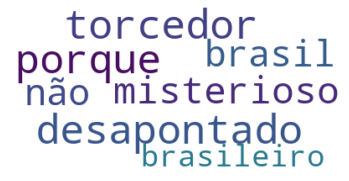

In [ ]:
# visulização/ tagloud com cores especificas
# colorir tags no texto: https://rebeccabilbro.github.io/colorizing-text-by-part-of-speech/

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(tokens))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
color_by_tagged = {pair[0]:"red" for pair in tokens_with_tags if pair[1]=="negemo"}

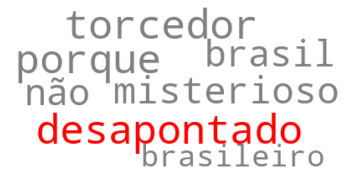

In [ ]:
# definir cor para tags
# https://amueller.github.io/word_cloud/auto_examples/colored_by_group.html
# colors_dict = {"desapontado":"red"}

def word_to_color(word,**kwargs):
  return color_by_tagged.get(word,"gray")
wordcloud.recolor(color_func=word_to_color)  # Aplicar uma nova cor na núvem é muito mais rápido do que criar uma nuvem nova do zero
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# preprocessar e depois filtrar tags ou vice versa

# Nossa função de preprocessamento

In [ ]:
'''
Recebe um texto bruto (raw text)
Retorna o bag of words com todos os termos normalizados (clean text)
'''
# Dicionario de stopwords suplementar
stop_words = stopwords.words('portuguese')
url = 'https://raw.githubusercontent.com/stopwords-iso/stopwords-pt/master/stopwords-pt.txt'
stopwords_from_github = pd.read_csv(url,header=None)
stop_words = set(stop_words + stopwords_from_github[0].tolist())  # NEW
def text_preprocess(text):
  tokens = word_tokenize(text)
  words = [word.lower() for word in tokens]
  words = [word for word in words if word.isalpha()]
  words = [w for w in words if not w in stop_words]
  words = [unidecode(w) for w in words]
  stemmer = RSLPStemmer()
  words = [stemmer.stem(w) for w in words]
  words = [w for w in words if len(w) >1 ]
  return(words)

In [ ]:
print(tokens_with_tags)
preprocessed_tokens_with_tags = [(text_preprocess(pair[0]),pair[1]) for pair in tokens_with_tags]
preprocessed_tokens_with_tags

[('desapontado', 'negemo'), ('porque', 'KS'), ('o', 'ART'), ('torcedor', 'N'), ('misterioso', 'NEGATIVE'), ('do', 'NPROP'), ('brasil', 'NPROP'), ('não', 'NEGATIVE'), ('é', 'V'), ('brasileiro', 'ADJ')]


[(['desapont'], 'negemo'),
 ([], 'KS'),
 ([], 'ART'),
 (['torc'], 'N'),
 (['misteri'], 'NEGATIVE'),
 ([], 'NPROP'),
 (['brasil'], 'NPROP'),
 ([], 'NEGATIVE'),
 ([], 'V'),
 (['brasil'], 'ADJ')]

In [ ]:
clean_tokens_with_tags = [(pair[0].pop(),pair[1]) for pair in preprocessed_tokens_with_tags if len(pair[0]) >0]
clean_tokens_with_tags

[('desapont', 'negemo'),
 ('torc', 'N'),
 ('misteri', 'NEGATIVE'),
 ('brasil', 'NPROP'),
 ('brasil', 'ADJ')]

In [ ]:
color_by_tagged = {pair[0]:"red" for pair in clean_tokens_with_tags if pair[1]=="negemo"}
color_by_tagged

{'desapont': 'red'}

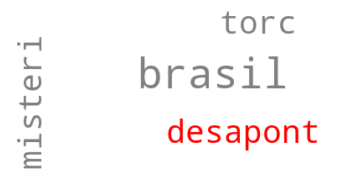

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join([pair[0] for pair in clean_tokens_with_tags]))
def word_to_color(word,**kwargs):
  return color_by_tagged.get(word,"gray")
wordcloud.recolor(color_func=word_to_color)  # Applying a new coloring is much faster than generating the whole wordcloud :https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#LEMBRETE dada a natureza do color manager (que pega as tags do que está minerado) talvez seja mais facil, simples e intuitivo ensinar colorir exatamente o que esta nos tokens with tags
# e deixar uma dica no fluxo do professor de como colorir o dicionario inteiro

In [ ]:
# pra toda base
documents_text = df['Document body text']
#tagged_tokens
simple_tokens = documents_text.apply(word_tokenize) #simple tokenizer; bag of words
simple_tokens.head()

0    [mano, o, torcedor, psicopata, do, Brasil, faz...
1    [torcedor, reclama, de, tudo, se, não, convoca...
2    [@, GinhoGFBPA, Cara, eu, torço, pro, inter, e...
3    [Tem, gente, que, quer, ser, Hexa, mas, não, m...
4    [@, ManuelaDavila, Pelo, visto, a, ONU, têm, m...
Name: Document body text, dtype: object

In [ ]:
simple_tokens_with_tags = [full_tagger.tag(doc_tokens) for doc_tokens in simple_tokens]
print(simple_tokens_with_tags[:2])

[[('mano', None), ('o', 'ART'), ('torcedor', 'N'), ('psicopata', 'N'), ('do', 'NPROP'), ('Brasil', 'NPROP'), ('faz', 'V'), ('ADS', None), ('na', 'NPROP'), ('Fatec', None), ('de', 'PREP'), ('franca', 'posemo'), (',', ','), ('agora', 'ADV'), ('eu', 'PROPESS'), ('entendi', 'V'), ('porq', None), ('q', None), ('ele', 'PROPESS'), ('é', 'V'), ('assim', 'ADV')], [('torcedor', 'N'), ('reclama', 'negemo'), ('de', 'PREP'), ('tudo', 'PROSUB'), ('se', 'POSITIVE'), ('não', 'NEGATIVE'), ('convoca', 'V'), ('reclama', 'negemo'), ('se', 'POSITIVE'), ('convoca', 'V'), ('reclama', 'negemo'), ('tmb', None), ('kkkkkkkkk', None)]]


In [ ]:
def preprocess_tagged_tokens(tokens_with_tags):
  preprocessed_tokens_with_tags = [(text_preprocess(pair[0]),pair[1]) for pair in tokens_with_tags]
  return [(pair[0].pop(),pair[1]) for pair in preprocessed_tokens_with_tags if len(pair[0]) >0]

In [ ]:
clean_tokens_with_tags = [preprocess_tagged_tokens(doc_tokens_with_tags) for doc_tokens_with_tags in simple_tokens_with_tags]
clean_tokens_with_tags[:2]

[[('man', None),
  ('torc', 'N'),
  ('psicopat', 'N'),
  ('brasil', 'NPROP'),
  ('ad', None),
  ('fatec', None),
  ('franc', 'posemo'),
  ('entend', 'V'),
  ('porq', None)],
 [('torc', 'N'),
  ('reclam', 'negemo'),
  ('convoc', 'V'),
  ('reclam', 'negemo'),
  ('convoc', 'V'),
  ('reclam', 'negemo'),
  ('tmb', None),
  ('kkkkkkkkk', None)]]

In [ ]:
adj_and_v_tokens = [pair for sublist in clean_tokens_with_tags
                    for pair in sublist if pair[1]=="ADJ" or pair[1]=="V"]
adj_and_v_tokens[:5]

[('entend', 'V'),
 ('convoc', 'V'),
 ('convoc', 'V'),
 ('torc', 'V'),
 ('merec', 'V')]

In [ ]:
color_by_tagged = {pair[0]:"green" for sublist in clean_tokens_with_tags
                   for pair in sublist if pair[1]=="ADJ"}

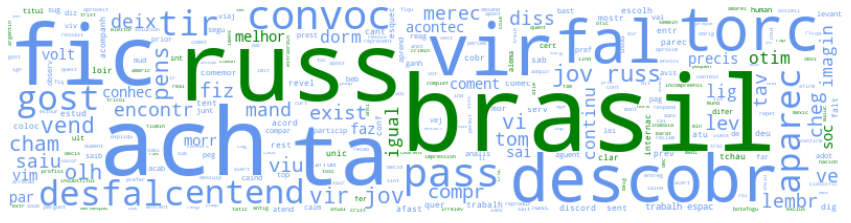

In [ ]:
# WordCloud https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

wordcloud = WordCloud(width=800,max_font_size=100, max_words=2000, background_color="white").generate(' '.join([pair[0] for pair in adj_and_v_tokens ]))

def word_to_color(word,**kwargs):
  return color_by_tagged.get(word,"cornflowerblue")

wordcloud.recolor(color_func=word_to_color)  # Applying a new coloring is much faster than generating the whole wordcloud :https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
plt.figure(figsize=(15,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
sentiment_tokens = [pair for sublist in clean_tokens_with_tags
                    for pair in sublist if pair[1]=="negemo" or pair[1]=="posemo"]
sentiment_tokens[:5]

[('franc', 'posemo'),
 ('reclam', 'negemo'),
 ('reclam', 'negemo'),
 ('reclam', 'negemo'),
 ('pec', 'negemo')]

In [ ]:
color_by_tagged = {pair[0]:"red" for pair in sentiment_tokens if pair[1]=="negemo"}
color_by_tagged.update({pair[0]:"green" for pair in sentiment_tokens if pair[1]=="posemo"})

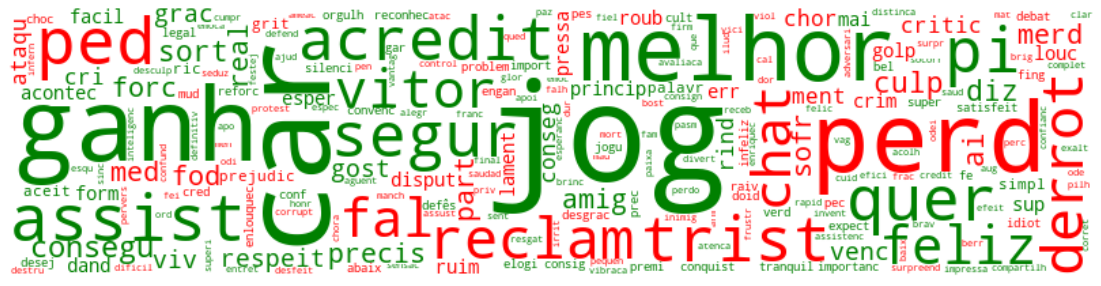

In [ ]:
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

wordcloud = WordCloud(width=800,max_font_size=100,
                      max_words=2000,
                      background_color="white").generate(' '.join([pair[0] for pair in sentiment_tokens ]))

def word_to_color(word,**kwargs):
  return color_by_tagged.get(word,"gray")

wordcloud.recolor(color_func=word_to_color)  # Applying a new coloring is much faster than generating the whole wordcloud :https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
plt.figure(figsize=(25,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Extra

## Como salvar um tagger

In [ ]:
### Salva tagger em arquivo

from pickle import dump,load

file = open("full_tagger.pkl", "wb")
dump(full_tagger, file, -1)
file.close()

In [ ]:
### Lê um arquivo de tagger

file = open("full_tagger.pkl", "rb")
dict_multi_tagger = load(file)
file.close()

## Como usar regex em um tagger


In [ ]:
# Usando regex
# para você treinar regras regex https://regexr.com/
# regex tagger: http://www.nltk.org/book_1ed/ch05.html


patterns = [ (r'#', 'AMPLIFICADOR'),
             (r'casa', 'MORADIA'),
           ]
regex_tagger = nltk.RegexpTagger(patterns)
regex_tagger.tag([word.lower() for word in ["#CristianoCarvalhoMyHero",
                                            "#curti",
                                            "casas",
                                            "CASA",
                                            "CASARÃO"]])

[('#cristianocarvalhomyhero', 'AMPLIFICADOR'),
 ('#curti', 'AMPLIFICADOR'),
 ('casas', 'MORADIA'),
 ('casa', 'MORADIA'),
 ('casarão', 'MORADIA')]